In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
def load_data():
    # You can replace this with actual e-commerce data
    # For now, we'll create a sample dataset
    np.random.seed(42)
    dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
    n_records = 10000

    data = {
        'order_id': range(1000, 1000 + n_records),
        'customer_id': np.random.randint(100, 500, n_records),
        'order_date': np.random.choice(dates, n_records),
        'product_category': np.random.choice(['Electronics', 'Clothing', 'Home & Kitchen', 'Books', 'Beauty'], n_records, p=[0.3, 0.25, 0.2, 0.15, 0.1]),
        'product_price': np.random.uniform(10, 500, n_records),
        'quantity': np.random.randint(1, 5, n_records),
        'customer_age': np.random.randint(18, 70, n_records),
        'customer_gender': np.random.choice(['Male', 'Female'], n_records),
        'payment_method': np.random.choice(['Credit Card', 'Debit Card', 'UPI', 'Wallet'], n_records),
        'city': np.random.choice(['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata'], n_records)
    }

    df = pd.DataFrame(data)
    df['total_sales'] = df['product_price'] * df['quantity']
    df['month'] = df['order_date'].dt.month
    df['day_of_week'] = df['order_date'].dt.day_name()

    return df

# Load data
df = load_data()
print("Dataset Overview:")
print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())


Dataset Overview:
Dataset Shape: (10000, 13)

First 5 rows:
   order_id  customer_id order_date product_category  product_price  quantity  \
0      1000          202 2023-07-29   Home & Kitchen     358.246607         2   
1      1001          448 2023-05-24         Clothing      85.979263         3   
2      1002          370 2023-12-11   Home & Kitchen     274.645776         3   
3      1003          206 2023-04-06            Books      49.499531         3   
4      1004          171 2023-12-12           Beauty     385.721428         1   

   customer_age customer_gender payment_method       city  total_sales  month  \
0            27          Female     Debit Card      Delhi   716.493215      7   
1            68            Male    Credit Card     Mumbai   257.937790      5   
2            65            Male    Credit Card    Kolkata   823.937329     12   
3            48          Female    Credit Card      Delhi   148.498594      4   
4            29          Female            UPI  

In [2]:
# Exploratory Data Analysis
print("=== BASIC DATA INFORMATION ===")
print(f"Dataset shape: {df.shape}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

print("\n=== DESCRIPTIVE STATISTICS ===")
print(df[['product_price', 'quantity', 'total_sales', 'customer_age']].describe())

=== BASIC DATA INFORMATION ===
Dataset shape: (10000, 13)

Data Types:
order_id                     int64
customer_id                  int64
order_date          datetime64[ns]
product_category            object
product_price              float64
quantity                     int64
customer_age                 int64
customer_gender             object
payment_method              object
city                        object
total_sales                float64
month                        int32
day_of_week                 object
dtype: object

Missing Values:
order_id            0
customer_id         0
order_date          0
product_category    0
product_price       0
quantity            0
customer_age        0
customer_gender     0
payment_method      0
city                0
total_sales         0
month               0
day_of_week         0
dtype: int64

=== DESCRIPTIVE STATISTICS ===
       product_price     quantity   total_sales  customer_age
count   10000.000000  10000.00000  10000.000000  1

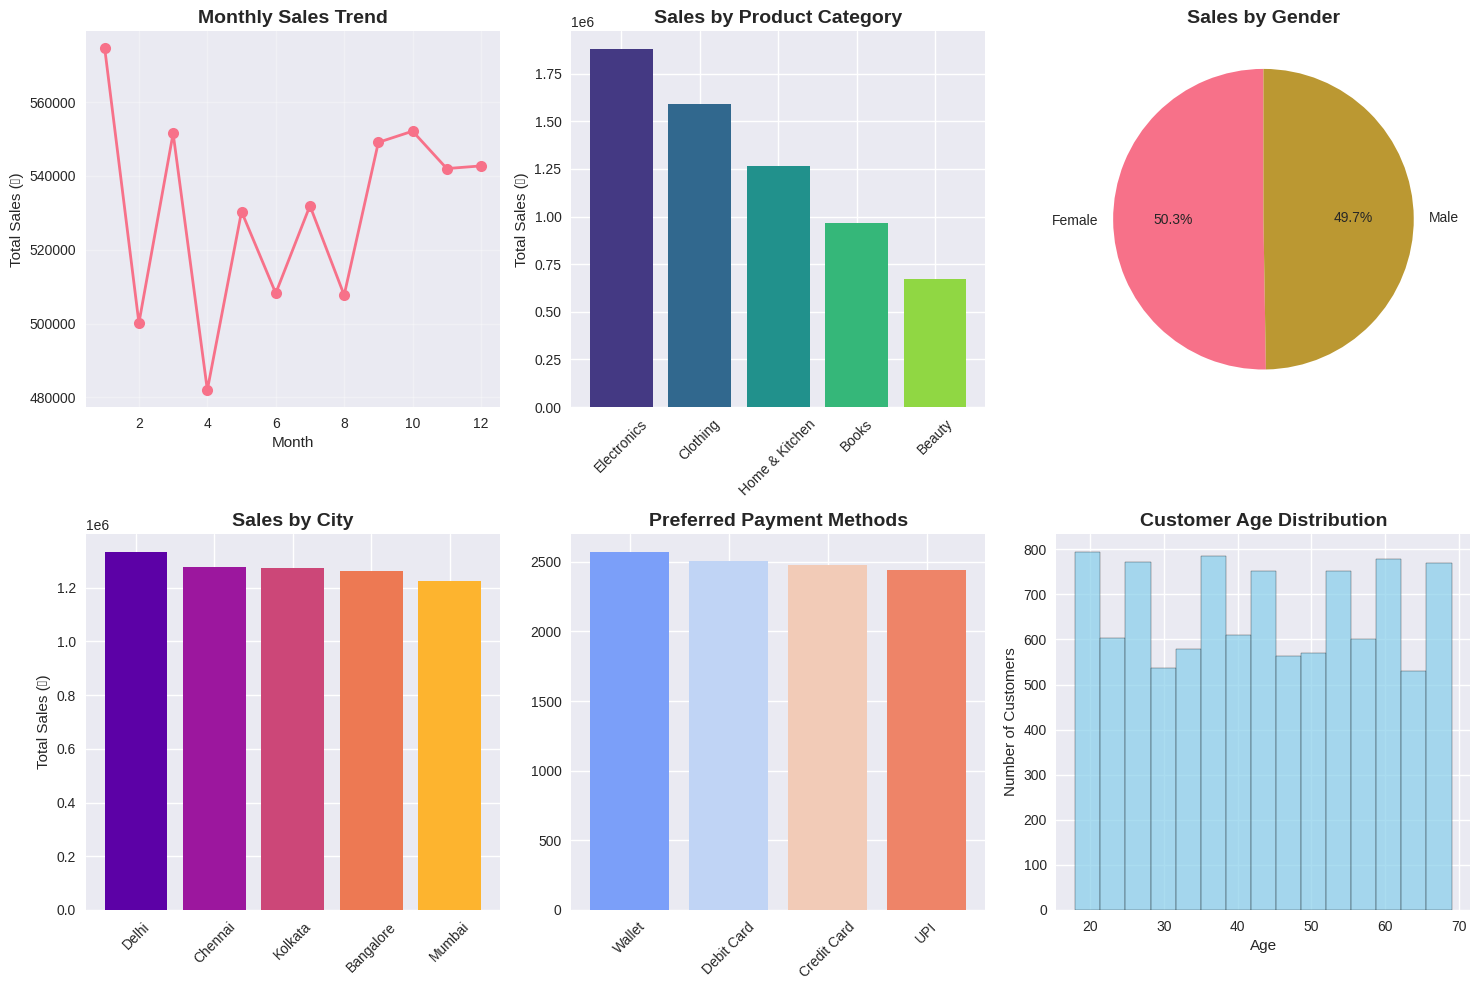

In [3]:
# Sales Analysis - Monthly Trends
plt.figure(figsize=(15, 10))

# 1. Monthly Sales Trend
plt.subplot(2, 3, 1)
monthly_sales = df.groupby('month')['total_sales'].sum()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, markersize=8)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.grid(True, alpha=0.3)

# 2. Sales by Category
plt.subplot(2, 3, 2)
category_sales = df.groupby('product_category')['total_sales'].sum().sort_values(ascending=False)
plt.bar(category_sales.index, category_sales.values, color=sns.color_palette("viridis", len(category_sales)))
plt.title('Sales by Product Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Total Sales (₹)')

# 3. Customer Demographics
plt.subplot(2, 3, 3)
gender_sales = df.groupby('customer_gender')['total_sales'].sum()
plt.pie(gender_sales.values, labels=gender_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Gender', fontsize=14, fontweight='bold')

# 4. Top Cities by Sales
plt.subplot(2, 3, 4)
city_sales = df.groupby('city')['total_sales'].sum().sort_values(ascending=False)
plt.bar(city_sales.index, city_sales.values, color=sns.color_palette("plasma", len(city_sales)))
plt.title('Sales by City', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Total Sales (₹)')

# 5. Payment Method Distribution
plt.subplot(2, 3, 5)
payment_dist = df['payment_method'].value_counts()
plt.bar(payment_dist.index, payment_dist.values, color=sns.color_palette("coolwarm", len(payment_dist)))
plt.title('Preferred Payment Methods', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# 6. Age Distribution
plt.subplot(2, 3, 6)
plt.hist(df['customer_age'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Customer Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

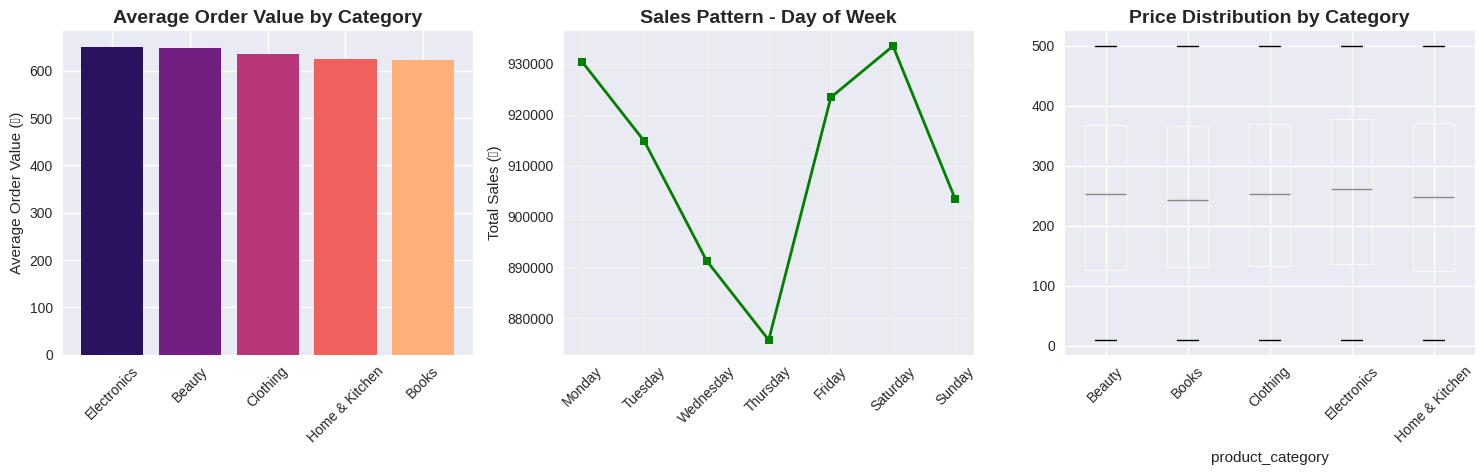

In [4]:
# Advanced Analysis - Customer Insights
plt.figure(figsize=(15, 5))

# 1. Average Order Value by Category
plt.subplot(1, 3, 1)
aov_category = df.groupby('product_category')['total_sales'].mean().sort_values(ascending=False)
plt.bar(aov_category.index, aov_category.values, color=sns.color_palette("magma", len(aov_category)))
plt.title('Average Order Value by Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Average Order Value (₹)')

# 2. Weekday Sales Pattern
plt.subplot(1, 3, 2)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = df.groupby('day_of_week')['total_sales'].sum().reindex(weekday_order)
plt.plot(weekday_sales.index, weekday_sales.values, marker='s', linewidth=2, markersize=6, color='green')
plt.title('Sales Pattern - Day of Week', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Total Sales (₹)')
plt.grid(True, alpha=0.3)

# 3. Price Distribution by Category
plt.subplot(1, 3, 3)
df.boxplot(column='product_price', by='product_category', ax=plt.gca())
plt.title('Price Distribution by Category', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove automatic title
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [5]:
# Machine Learning - Customer Value Prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Prepare data for ML
print("=== MACHINE LEARNING: CUSTOMER VALUE PREDICTION ===")

# Create customer features
customer_data = df.groupby('customer_id').agg({
    'total_sales': 'sum',
    'order_id': 'count',
    'product_price': 'mean',
    'customer_age': 'first',
    'customer_gender': 'first',
    'city': 'first'
}).rename(columns={'order_id': 'total_orders', 'product_price': 'avg_order_value'})

# Encode categorical variables
le_gender = LabelEncoder()
le_city = LabelEncoder()

customer_data['gender_encoded'] = le_gender.fit_transform(customer_data['customer_gender'])
customer_data['city_encoded'] = le_city.fit_transform(customer_data['city'])

# Features and target
X = customer_data[['total_orders', 'avg_order_value', 'customer_age', 'gender_encoded', 'city_encoded']]
y = customer_data['total_sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

=== MACHINE LEARNING: CUSTOMER VALUE PREDICTION ===
R² Score: 0.7125
Mean Absolute Error: 1653.99
Root Mean Squared Error: 2003.48

Feature Importance:
           feature  importance
0     total_orders    0.723770
1  avg_order_value    0.200043
2     customer_age    0.045023
4     city_encoded    0.022403
3   gender_encoded    0.008762


In [6]:
# Key Business Insights Summary
print("="*60)
print("KEY BUSINESS INSIGHTS SUMMARY")
print("="*60)

total_revenue = df['total_sales'].sum()
avg_order_value = df['total_sales'].mean()
total_customers = df['customer_id'].nunique()
total_orders = df['order_id'].nunique()

print(f"📊 Total Revenue: ₹{total_revenue:,.2f}")
print(f"💰 Average Order Value: ₹{avg_order_value:.2f}")
print(f"👥 Total Unique Customers: {total_customers}")
print(f"🛒 Total Orders: {total_orders}")

# Best performing category
best_category = df.groupby('product_category')['total_sales'].sum().idxmax()
best_category_sales = df.groupby('product_category')['total_sales'].sum().max()

print(f"🏆 Best Performing Category: {best_category} (₹{best_category_sales:,.2f})")

# Top city
top_city = df.groupby('city')['total_sales'].sum().idxmax()
print(f"📍 Top Revenue City: {top_city}")

# Most popular payment method
popular_payment = df['payment_method'].value_counts().idxmax()
print(f"💳 Most Popular Payment: {popular_payment}")

print("\n📈 RECOMMENDATIONS:")
print("• Focus marketing efforts on", best_category, "category")
print("• Expand operations in", top_city, "and similar metro cities")
print("• Optimize payment processing for", popular_payment)
print("• Target age group", df['customer_age'].mode().iloc[0], "for advertising")
print("="*60)

KEY BUSINESS INSIGHTS SUMMARY
📊 Total Revenue: ₹6,372,522.65
💰 Average Order Value: ₹637.25
👥 Total Unique Customers: 400
🛒 Total Orders: 10000
🏆 Best Performing Category: Electronics (₹1,878,049.99)
📍 Top Revenue City: Delhi
💳 Most Popular Payment: Wallet

📈 RECOMMENDATIONS:
• Focus marketing efforts on Electronics category
• Expand operations in Delhi and similar metro cities
• Optimize payment processing for Wallet
• Target age group 22 for advertising


In [8]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.1 MB/s eta 0:00:00


2025-11-21 15:37:03.710 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 15:37:03.715 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 15:37:04.178 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-21 15:37:04.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 15:37:04.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 15:37:04.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-21 15:37:04.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

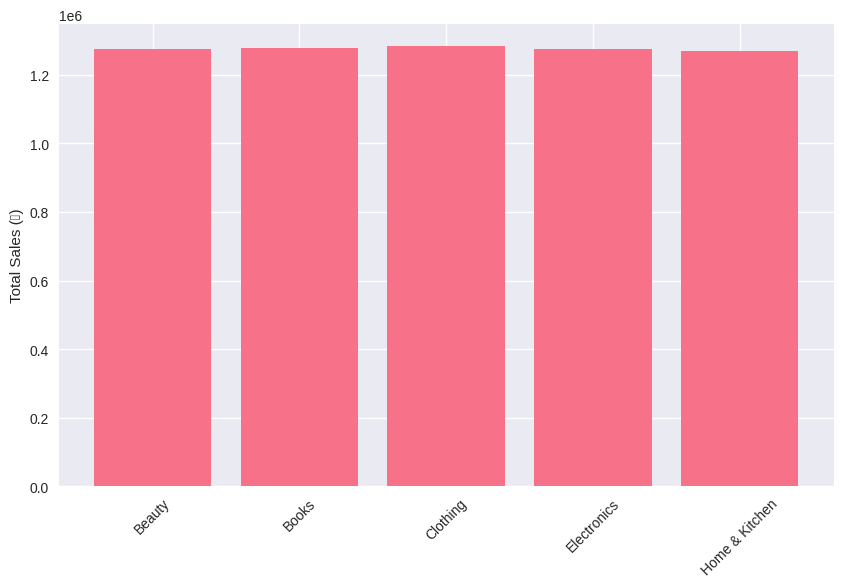

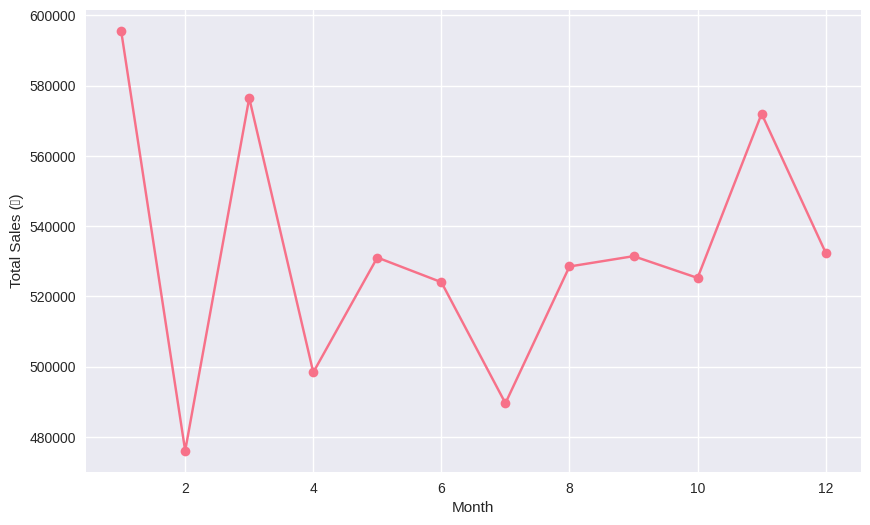

In [9]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Page configuration
st.set_page_config(
    page_title="E-commerce Sales Dashboard",
    page_icon="📊",
    layout="wide"
)

# Title
st.title("🛍️ E-commerce Sales Analysis Dashboard")
st.markdown("---")

# Load data (using the same function from notebook)
@st.cache_data
def load_data():
    # Add the data loading function from above
    np.random.seed(42)
    dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
    n_records = 10000

    data = {
        'order_id': range(1000, 1000 + n_records),
        'customer_id': np.random.randint(100, 500, n_records),
        'order_date': np.random.choice(dates, n_records),
        'product_category': np.random.choice(['Electronics', 'Clothing', 'Home & Kitchen', 'Books', 'Beauty'], n_records),
        'product_price': np.random.uniform(10, 500, n_records),
        'quantity': np.random.randint(1, 5, n_records),
        'customer_age': np.random.randint(18, 70, n_records),
        'customer_gender': np.random.choice(['Male', 'Female'], n_records),
        'payment_method': np.random.choice(['Credit Card', 'Debit Card', 'UPI', 'Wallet'], n_records),
        'city': np.random.choice(['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata'], n_records)
    }

    df = pd.DataFrame(data)
    df['total_sales'] = df['product_price'] * df['quantity']
    df['month'] = df['order_date'].dt.month
    return df

df = load_data()

# Key Metrics
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.metric("Total Revenue", f"₹{df['total_sales'].sum():,.2f}")

with col2:
    st.metric("Total Orders", f"{df['order_id'].nunique():,}")

with col3:
    st.metric("Average Order Value", f"₹{df['total_sales'].mean():.2f}")

with col4:
    st.metric("Unique Customers", f"{df['customer_id'].nunique():,}")

st.markdown("---")

# Charts
col1, col2 = st.columns(2)

with col1:
    st.subheader("Sales by Category")
    category_sales = df.groupby('product_category')['total_sales'].sum()
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(category_sales.index, category_sales.values)
    ax.set_ylabel('Total Sales (₹)')
    plt.xticks(rotation=45)
    st.pyplot(fig)

with col2:
    st.subheader("Monthly Sales Trend")
    monthly_sales = df.groupby('month')['total_sales'].sum()
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(monthly_sales.index, monthly_sales.values, marker='o')
    ax.set_ylabel('Total Sales (₹)')
    ax.set_xlabel('Month')
    st.pyplot(fig)

# Data Table
st.subheader("Sample Data")
st.dataframe(df.head(10))

st.markdown("---")
st.markdown("Built with ❤️ using Streamlit")